In [1]:
%pylab inline

import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('../log/connectionLog.csv', comment='#')

In [3]:
cuttedData = data[['time','type']]

In [4]:
maxTimeIteration = data.max()['time']

In [5]:
cuttedSingleData = cuttedData.loc[cuttedData['time'] ==  1]
cuttedSingleData['type'].shape[0]

674

Text(0.5,0,'time')

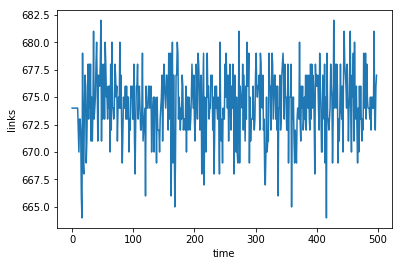

In [11]:
for i in range(maxTimeIteration):
    a = 0
    r = 0
    cuttedSingleData = cuttedData.loc[cuttedData['time'] ==  i]
    if i == 0:
        arr = np.zeros([1])
        continue
    if i == 1:
        init = cuttedSingleData['type'].shape[0]
        arr = np.append(arr, init)
        continue
    for i in cuttedSingleData['type']:
        if str(i) == 'u':
            continue
        elif str(i) == 'a':
            a = a + 1
        elif str(i) == 'r':
            r = r + 1
    somma = a - r
    arr = np.append(arr, init + somma)
    
arr = np.delete(arr, 0)
plot(arr)
ylabel('links')
xlabel('time')

c. ang 674.071022044
o. orig 0.000785184827487


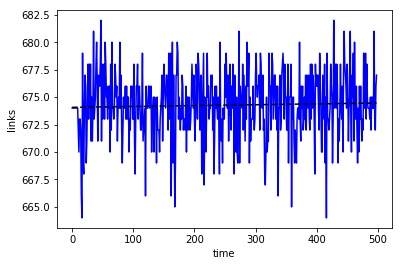

In [12]:
x = range(maxTimeIteration - 1)
fit = np.polyfit(x, arr, 1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y
plt.plot(x, arr, 'b', x, fit_fn(x), '--k')
ylabel('links')
xlabel('time')
print("c. ang", fit_fn[0])
print("o. orig", fit_fn[1])


In [9]:
l = int(arr[1] - arr[-1])
if l == 0:
    print(abs(l), "links added")
elif l > 0:
    if l == 1:
        print(abs(l), "link added")
    print(abs(l), "links added")
if l < 0:
    if l == -1:
        print(abs(l), "link removed")
    print(abs(l), "links removed")

3 links removed
